In [25]:
# 引入所需要的全部包  git 修改测试，commited
import sklearn
from sklearn.model_selection import train_test_split # 数据划分的类
from sklearn.linear_model import LinearRegression # 线性回归的类
from sklearn.preprocessing import StandardScaler # 数据标准化
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

import warnings
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
import time

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [3]:
## 设置字符集，防止中文乱码
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False

In [4]:
# 加载数据
# 日期、时间、有功功率、无功功率、电压、电流、厨房用电功率、洗衣服用电功率、热水器用电功率
path1='household_power_consumption_1000.txt'
df = pd.read_csv(path1, sep=';', low_memory=False)#没有混合类型的时候可以通过low_memory=F调用更多内存，加快效率）

In [5]:
# 异常数据处理(异常数据过滤)
new_df = df.replace('?',np.nan)
datas = new_df.dropna(axis=0) #default any  存在na 就舍弃行或列
datas.describe()



,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.0,1000.000000,1000.000000
mean,2.418772,0.089232,240.03579,10.351000,0.0,2.749000,5.756000
std,1.239979,0.088088,4.08442,5.122214,0.0,8.104053,8.066941
min,0.206000,0.000000,230.98000,0.800000,0.0,0.000000,0.000000
25%,1.806000,0.000000,236.94000,8.400000,0.0,0.000000,0.000000
50%,2.414000,0.072000,240.65000,10.000000,0.0,0.000000,0.000000
75%,3.308000,0.126000,243.29500,14.000000,0.0,1.000000,17.000000
max,7.706000,0.528000,249.37000,33.200000,0.0,38.000000,19.000000


In [ ]:
new_df.dropna()

#### 计算电流功率 关系 
$UI=P$  
线性关系

In [6]:
#取数值、分割、标准化
X= datas.iloc[:,2:4] #切片去尾
Y = datas.iloc[:,5] #就是该列

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)# 数据在分割完成以后，会将dataframe 变成

scalar = StandardScaler()  #好像是默认copy 一份x，不改变原来的x数据
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test) #直接使用train 中计算的标化值

In [7]:
#模型训练
lr = LinearRegression()
lr.fit(X_train,Y_train)

#预测结果
Y_predict = lr.predict(X_test)

#准确率r^2、参数、截距
print("准确率r^2：%s"%lr.score(X_test,Y_test)) #
print("参数：%s"%lr.coef_)
print("截距：%s"%lr.intercept_)


准确率r^2：0.9897105056381377
参数：[4.9998179  0.08326753]
截距：10.5725


D:\Program\Miniconda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  if __name__ == '__main__':


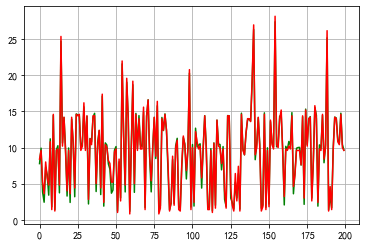

In [9]:
#绘图
t = np.arange(0,len(X_test[:,0]))

fig = plt.figure()
plt.plot(t,Y_predict,'g-')
plt.plot(t,Y_test,'r-')
plt.grid()

fig.show()

#### 模型存储 载入
dump load

In [39]:
from sklearn.externals import joblib

joblib.dump(scalar,"myscalar.model")
joblib.dump(lr,"mylr.model")

D:\Program\Miniconda\envs\tensorflow\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['mylr.model']

In [46]:
scalar2 = joblib.load("myscalar.model")
lr2 = joblib.load("mylr.model")
data_var = [[2006, 12]]
data_var = scalar2.transform(data_var)
lr2.predict(data_var)

array([8254.66294568])

#### 计算时间序列
时间与电压间的关系

In [17]:
#字符串 2 数组
#每一行的tuple 必须转成series
%time
def t_str2list(Xt_temp):
    t=time.strptime(" ".join(Xt_temp),'%d/%m/%Y %H:%M:%S')
    return t[0:6]
Xt = datas.iloc[:,0:2]
Xt1 = Xt.apply(lambda x : pd.Series(t_str2list(x)),axis=1)

Y = datas.iloc[:,4]

X_train,X_test,Y_train,Y_test = train_test_split(Xt1,Y,test_size=0.2,random_state=42) 
pd.DataFrame(X_train).describe()
scalar3 = StandardScaler() 
X_train = scalar3.fit_transform(X_train) #对X进行标准化，Y不标准化，但是对时间标准化 应该没意义，因为增长性序列化，不是随机正态
X_test = scalar3.transform(X_test)

lr3 = LinearRegression()
lr3.fit(X_train,Y_train)
Y_predict = lr3.predict(X_test)
print(lr3.score(X_test,Y_test))
print(lr3.coef_)#参数
print(lr3.intercept_)#截距


Wall time: 0 ns
0.5077356074517024
[ 0.00000000e+00 -4.44089210e-16  4.07641629e+00  1.04106318e+00
  1.77400078e-01  0.00000000e+00]
239.9194


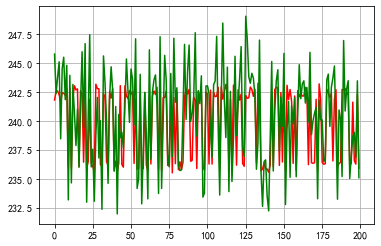

In [18]:
#绘图
n = np.arange(0,len(X_test[:,0]))

plt.figure()

plt.plot(n,Y_predict,'r-')
plt.plot(n,Y_test,'g-')
plt.grid()
plt.show()

#### 过拟合
参数过多 过大有可能存在过拟合  
树中，叶子节点过多 树过多
* 过拟合修正 
    * 通过在目标函数中加入参数θ^2来过滤掉大θ的影响（称作正则项或者惩罚项）
    * L1-norm 和 L2-norm 分别是在J中加入θ的第一范式和低二范式，修正完后的J称为Lasso回归 和 岭回归 ridge
    * 因而衍生出来的特征选择，也就是，可以筛出一些值为0的参数，对应的特征对模型没有贡献


#### pipeline 模式
同一线性模型，poly阶数调整比较
* 多个不同的操作，给定每个不同操作的名称，执行的时候，按照从前到后的顺序执行

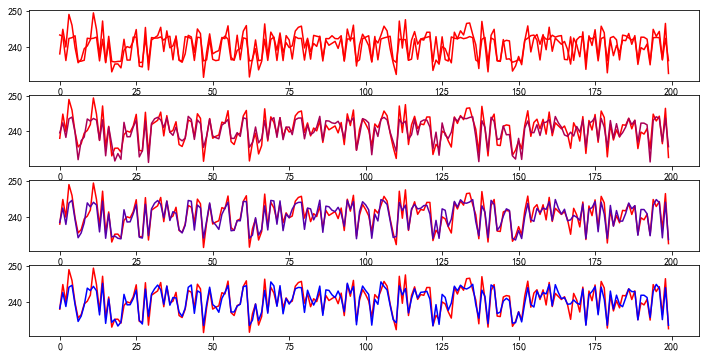

In [36]:
models = [
    Pipeline([
        ('Poly', PolynomialFeatures()), #步骤名称多项式扩展
        ('Linear', LinearRegression(fit_intercept=False)) #线性回归，无截距
    ])
]
model = models[0] #去掉了中括号
X = datas.iloc[:,0:2]
# model
# X = X.apply(lambda x : pd.Series(t_str2list(x)),axis=1)
X = X.apply(lambda x : pd.Series(t_str2list(x)),axis=1)
Y = datas.iloc[:,4]

# 数据拆分
X_train,X_test,Y_train,Y_test  = train_test_split(X,Y,test_size = 0.2,random_state = 0)

#数据标准化
ss = StandardScaler()
X_train  = ss.fit_transform(X_train)
X_test = ss.transform(X_test) #用训练数据标准化测试X数据

#模型训练 lr=LinearRegression fit拟合
##由于模型修改参数，需要同一个模型写多次，将这些模型写入pipeline 中
N = 5
d_pool = np.arange(1,N,1) #拟合最高阶 阶数池
m = d_pool.size
clrs = [] #colors
for c in np.linspace(16711680, 255, m):
    clrs.append('#%06x'%int(c)) #等距取255-16711680 四个数字，转成6位的16进制数字
line_width=3

t = np.arange(len(X_test[:,0]))
plt.figure(figsize=(12,6),facecolor='w') #窗口大小、颜色
for i,d in enumerate(d_pool):
    plt.subplot(N-1,1,i+1) #N-1 行 1列中，第i+1个位置
    plt.plot(t,Y_test,'r-',label = u'真实值')
    
    ##model 预测，参数等信息
    model.set_params(Poly__degree=d) #设置多项式的阶
    model.fit(X_train, Y_train) #模型训练
    
    linear_model = model.get_params()['Linear'] #获得模型参数
    output = u'%d阶，系数：'%d
    if hasattr(linear_model, 'alpha_'):
        idx = output.find(u'系数')
        output = output[:idx]
    ##model 预测结果
    y_hat = model.predict(X_test)
    plt.plot(t,y_hat,clrs[i],label = u'hat值')